In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Load in data
df = pd.read_csv("Resources/divorce.csv")

# Display the DataFrame
df.head()

,Couple#,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,1,2,2,4,1,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,2,4,4,4,4,4,0,0,4,4,...,2,2,3,4,4,4,4,2,2,1
2,3,2,2,2,2,1,3,2,1,1,...,3,2,3,1,1,1,2,2,2,1
3,4,3,2,3,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,5,2,2,1,1,1,1,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
# Show the total number of divorces (1=yes) and non-divorce (0=no) outcomes
df['Divorce_Y_N'].value_counts()


Divorce_Y_N
0    86
1    84
Name: count, dtype: int64

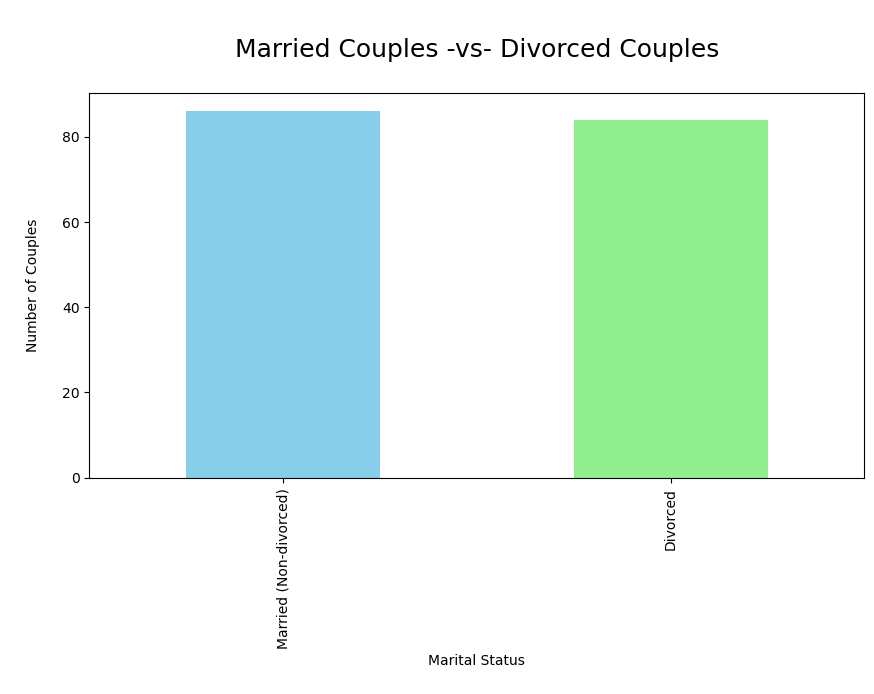

In [4]:
# Plot Couples Marital Status
# Define mapping of values to names
mapping = {
    0: 'Married (Non-divorced)',
    1: 'Divorced'
}

# Replace 0 and 1 with names divorces (1=yes) and non-divorce (0=no) using the mapping
revised_df = df.copy()

revised_df['Divorce_Y_N'] = revised_df['Divorce_Y_N'].replace(mapping)
revised_df = revised_df['Divorce_Y_N']
revised_df

colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(10, 5))
revised_df.value_counts().plot(kind='bar', color = colors)
plt.xlabel('Marital Status\n')
plt.ylabel('\nNumber of Couples\n')
plt.title('\nMarried Couples -vs- Divorced Couples\n', fontsize=18)
plt.show()

In [5]:
# Drop all repeative columns
# Clean data
new_df = df.copy()
new_df = new_df.iloc[:, [0, 1, 6, 7, 10, 12, 13, 16, 18, 20, 24, 28, 29, 30, 31, 32, 38, 46, 47, 48, 52, 54, 55]]
new_df.columns


Index(['Couple#', 'Sorry_end', 'No_home_time', '2_strangers', 'common_goals',
       'freeom_value', 'entertain', 'love', 'marriage', 'trust', 'stresses',
       'hopes_wishes', 'know_well', 'friends_social', 'Aggro_argue',
       'Always_never', 'hate_subjects', 'silence_for_harm',
       'silence_fear_anger', 'I'm_right', 'no_hesitancy_inadequate',
       'incompetence', 'Divorce_Y_N'],
      dtype='object')

In [6]:
# Visualization of data
new_df.head(20)

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence,Divorce_Y_N
0,1,2,0,0,0,0,1,1,0,1,...,1,1,2,1,2,1,3,3,1,1
1,2,4,0,0,4,3,4,4,4,2,...,1,0,4,4,2,2,3,4,2,1
2,3,2,3,2,2,4,2,3,3,2,...,2,3,3,1,3,2,3,2,2,1
3,4,3,3,3,3,3,3,3,3,4,...,3,2,3,3,2,2,3,2,2,1
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,0,2,1,2,2,0,1
5,6,0,2,0,1,2,1,0,1,1,...,0,4,1,2,2,2,1,1,0,1
6,7,3,3,4,2,2,2,3,3,2,...,2,1,2,2,3,2,3,2,2,1
7,8,2,1,0,2,3,2,3,3,1,...,3,1,1,4,0,1,2,1,0,1
8,9,2,4,1,3,3,3,3,3,3,...,3,1,1,2,1,1,1,1,1,1
9,10,1,2,0,2,0,0,0,2,0,...,1,1,1,1,2,0,2,4,3,1


In [7]:
# Drop the label to create the X data

X = new_df.drop("Divorce_Y_N", axis=1)
X

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,know_well,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence
0,1,2,0,0,0,0,1,1,0,1,...,0,1,1,2,1,2,1,3,3,1
1,2,4,0,0,4,3,4,4,4,2,...,1,1,0,4,4,2,2,3,4,2
2,3,2,3,2,2,4,2,3,3,2,...,3,2,3,3,1,3,2,3,2,2
3,4,3,3,3,3,3,3,3,3,4,...,1,3,2,3,3,2,2,3,2,2
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,1,0,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,0,0,0,0,0,0,0,0,0,...,0,0,4,4,0,1,0,4,2,2
166,167,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,1,2,3,2
167,168,1,0,0,1,1,1,1,0,1,...,0,1,1,1,1,3,0,2,3,0
168,169,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,3,2,4,1


In [8]:
# Create the y set from the "Divorce_Y_N" column

y = new_df["Divorce_Y_N"]
y


0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Divorce_Y_N, Length: 170, dtype: int64

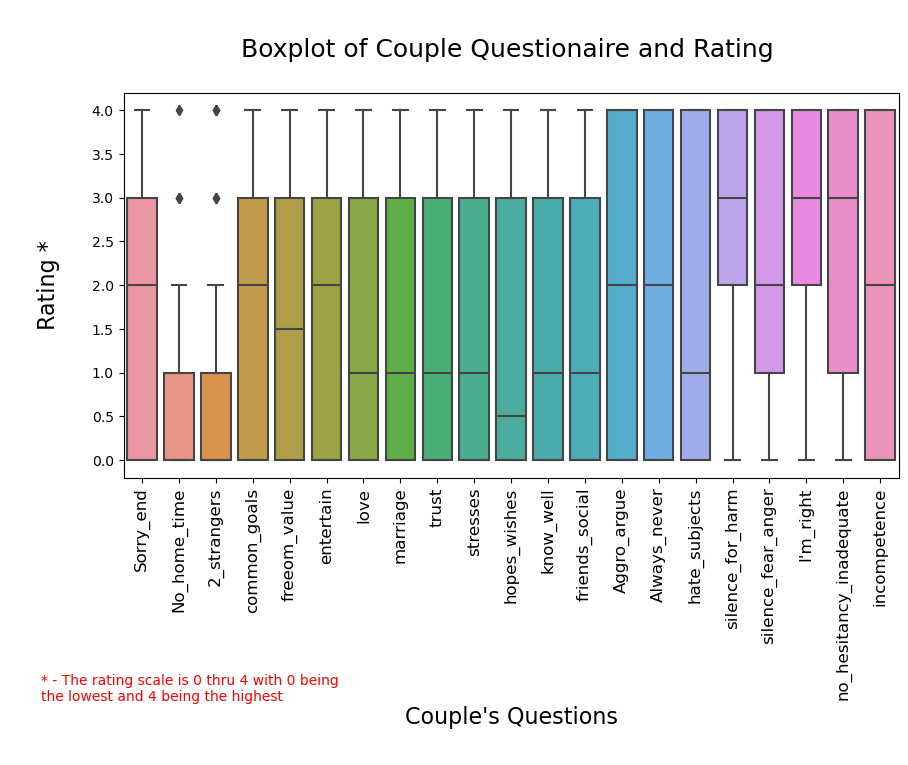

In [9]:
# Boxplot of Couple's Questions
data = new_df.drop(columns=['Couple#','Divorce_Y_N'])
plt.figure(figsize=(10, 5))
sns.boxplot(data)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel("Couple's Questions\n", fontsize=16)
plt.ylabel('\n Rating * \n', fontsize=16)
plt.text(-2.75, -2.75, '* - The rating scale is 0 thru 4 with 0 being \nthe lowest and 4 being the highest', fontsize=10, color='red')
plt.title( f"\nBoxplot of Couple Questionaire and Rating \n", fontsize=18) 
plt.show()

In [10]:
new_df.head()

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence,Divorce_Y_N
0,1,2,0,0,0,0,1,1,0,1,...,1,1,2,1,2,1,3,3,1,1
1,2,4,0,0,4,3,4,4,4,2,...,1,0,4,4,2,2,3,4,2,1
2,3,2,3,2,2,4,2,3,3,2,...,2,3,3,1,3,2,3,2,2,1
3,4,3,3,3,3,3,3,3,3,4,...,3,2,3,3,2,2,3,2,2,1
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,0,2,1,2,2,0,1


/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_58868/750842304.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='marriage', y='trust', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


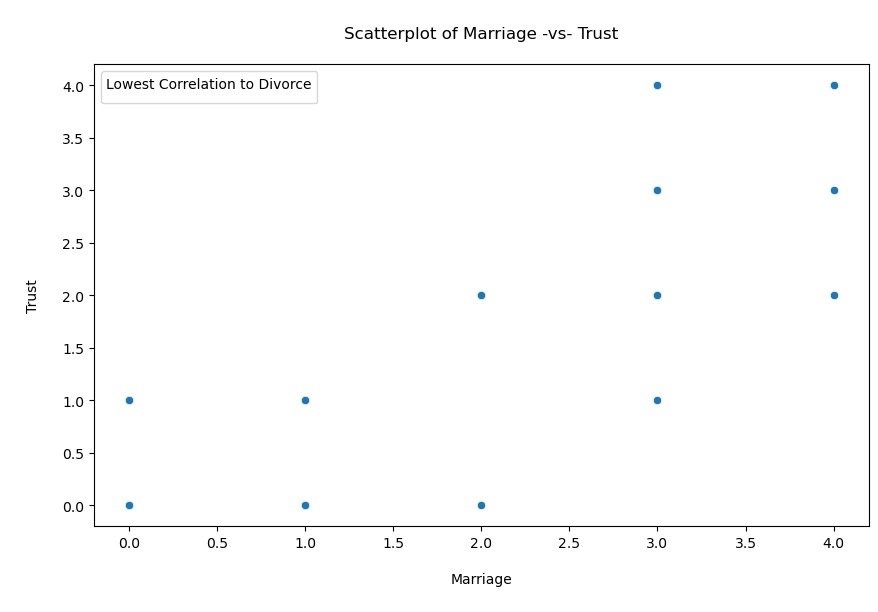

In [11]:
# Scatterplot - eb
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='marriage', y='trust', palette='coolwarm')
plt.title('\nScatterplot of Marriage -vs- Trust\n')
plt.xlabel('\nMarriage\n')
plt.ylabel('\nTrust\n')
plt.legend(title='Lowest Correlation to Divorce')
plt.show()

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_58868/3856645328.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='2_strangers', y="I'm_right", palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


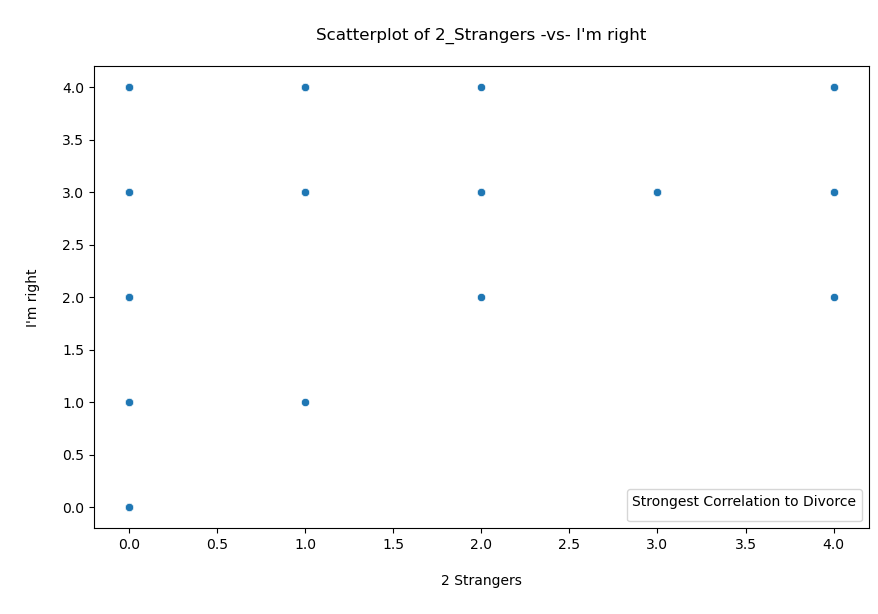

In [12]:
# Scatterplot - eb
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='2_strangers', y="I'm_right", palette='coolwarm')
plt.title("\nScatterplot of 2_Strangers -vs- I'm right\n")
plt.xlabel('\n2 Strangers\n')
plt.ylabel("\nI'm right\n")
plt.legend(title='Strongest Correlation to Divorce')
plt.show()

marriage                   0.923208
trust                      0.907008
know_well                  0.892954
love                       0.886260
hate_subjects              0.883311
friends_social             0.874531
freeom_value               0.868983
Couple#                    0.865980
Sorry_end                  0.861324
hopes_wishes               0.846606
entertain                  0.844743
stresses                   0.839392
common_goals               0.834897
Always_never               0.829056
incompetence               0.806765
Aggro_argue                0.792607
silence_fear_anger         0.656409
no_hesitancy_inadequate    0.651478
I'm_right                  0.619830
2_strangers                0.544835
Name: Divorce_Y_N, dtype: float64


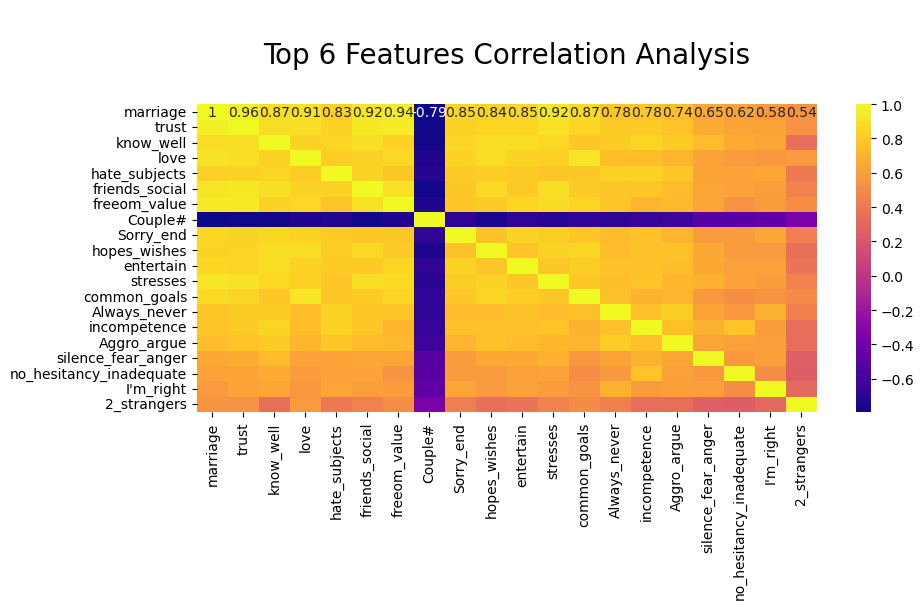

In [13]:
# Highest to lowest Correlation - ca
# 'Divorce_Y_N' is a column in our dataframe
# Calculate correlation of features with 'Divorce_Y_N' and drop 'Divorce_Y_N' itself
corr = new_df.corr()['Divorce_Y_N'].drop('Divorce_Y_N')

# Sort correlations by absolute values and take top 20
sort_corr = corr.abs().sort_values(ascending=False)[:20]

# Display the sorted correlations
print(sort_corr)

# Calculate the correlation matrix of the top correlated features
top_features = sort_corr.index.tolist()

# List of the top features
corr_top_features = new_df[top_features].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 4))

# Create a heatmap of the correlations of the top features
sns.heatmap(corr_top_features,
            annot=True,  # Annotate cells with correlation values
            xticklabels=corr_top_features.columns,
            yticklabels=corr_top_features.columns,
            cmap="plasma")

# Add a title to the heatmap
plt.title("\nTop 6 Features Correlation Analysis\n", fontsize=20)

# Display the plot
plt.show()


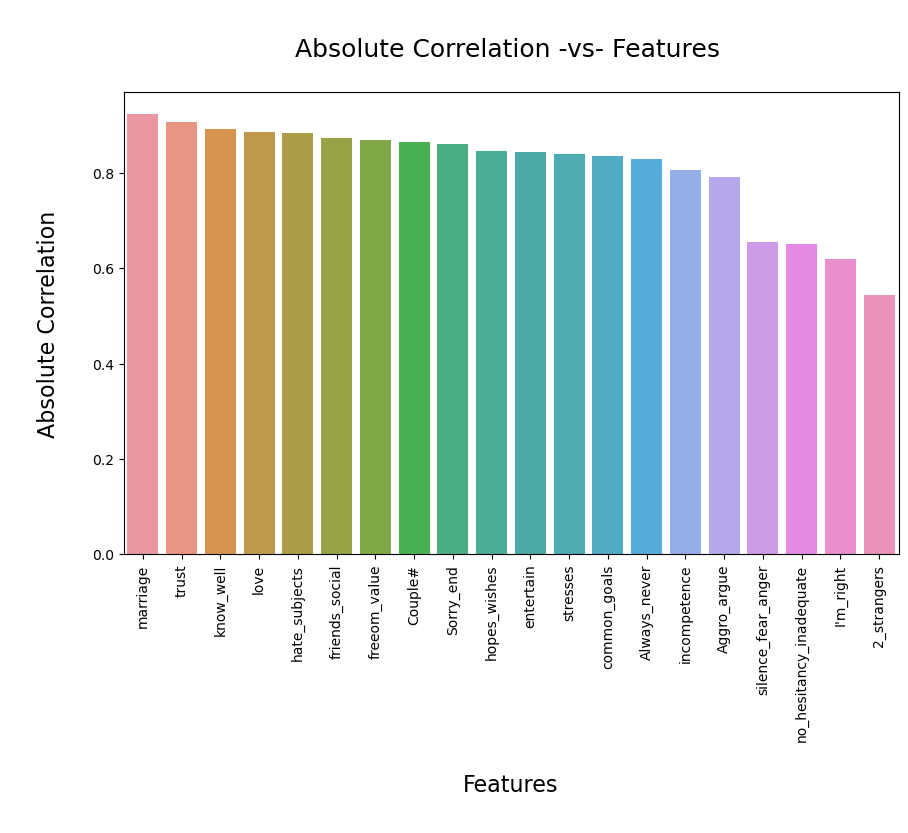

In [14]:
# Coorelation / Bar chart - ca
# show bar to compare correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=sort_corr.index, y=sort_corr)
plt.xticks(rotation=90)
plt.xlabel('\nFeatures\n', fontsize=16)
plt.ylabel('\nAbsolute Correlation\n', fontsize=16)
plt.title( f"\nAbsolute Correlation -vs- Features \n", fontsize=18)
plt.show()

In [15]:
# Split the data into training and testing sets using random_state=1

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

In [16]:
# Scale the X data by using StandardScaler()

Scaler = StandardScaler().fit(X_train)
X_train_scale = Scaler.transform(X_train)
X_train_scale


array([[-0.05682364, -1.09451276, -0.82032067, ..., -2.44877613,
        -1.69785764, -0.58350879],
       [-0.85423823,  1.41004798,  1.30581658, ...,  1.11563153,
         0.99749136,  1.22394528],
       [-0.23624192,  1.41004798, -0.82032067, ...,  1.11563153,
        -1.02402039, -1.18599348],
       ...,
       [-0.29604802,  0.78390779,  0.24274795, ...,  0.22452962,
         0.32365411,  0.62146059],
       [ 1.05955679, -1.09451276,  0.24274795, ..., -0.6665723 ,
         0.32365411,  0.0189759 ],
       [-0.99378579,  0.78390779,  0.24274795, ...,  1.11563153,
         0.32365411,  1.22394528]])

In [17]:
# Transform the test dataset based on the fit from the training dataset

X_test_scale = Scaler.transform(X_test)
X_test_scale


array([[-0.77449677,  1.41004798,  1.30581658, -0.56481532,  0.28478735,
         0.26359329,  1.51404804,  0.34648653,  0.3186699 ,  0.38109917,
         0.32718241,  0.49742085,  1.63975507,  0.35551897,  1.17598517,
         1.2054088 ,  1.2557978 ,  1.05964346,  1.08307584,  1.11563153,
         0.99749136,  1.22394528],
       [ 0.08272392, -1.09451276, -0.82032067, -0.56481532, -1.13356534,
        -1.10278825, -1.25262967, -0.98696163, -0.96612621, -0.92699799,
        -1.0351837 , -0.87589324, -0.93121893, -0.99226936, -0.69870249,
        -0.65394648, -1.07246965, -0.40312523, -1.48796401, -0.6665723 ,
        -1.02402039, -1.18599348],
       [-1.35262235,  1.41004798, -0.82032067, -0.56481532,  0.9939637 ,
         1.62997482,  1.51404804,  1.01321061,  1.60346602,  1.68919633,
         1.68954853,  1.18407789,  1.63975507,  1.7033073 ,  1.17598517,
         0.58562371,  0.67373093,  0.32825911,  1.08307584,  0.22452962,
         0.99749136,  1.22394528],
       [-1.03365652

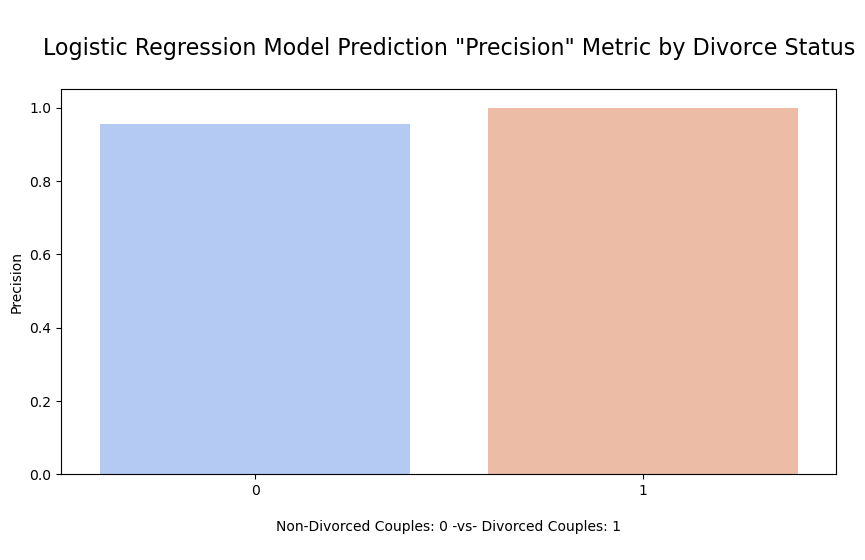

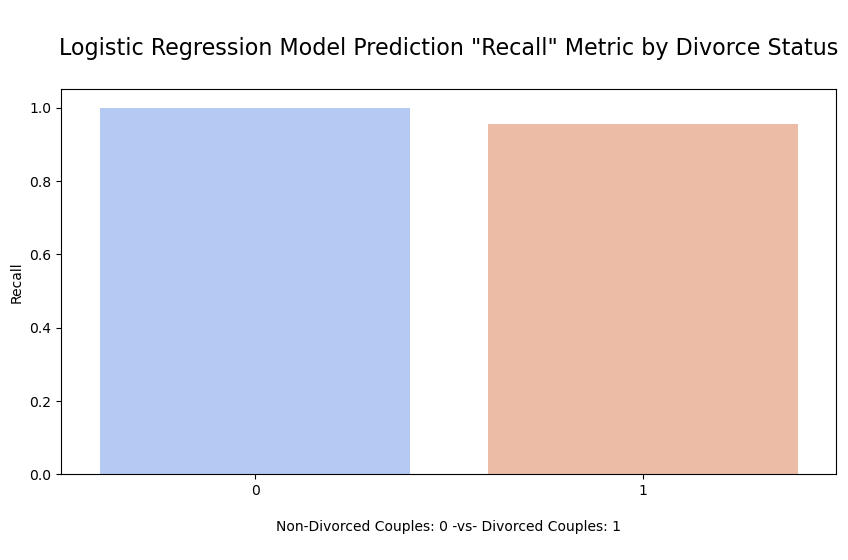

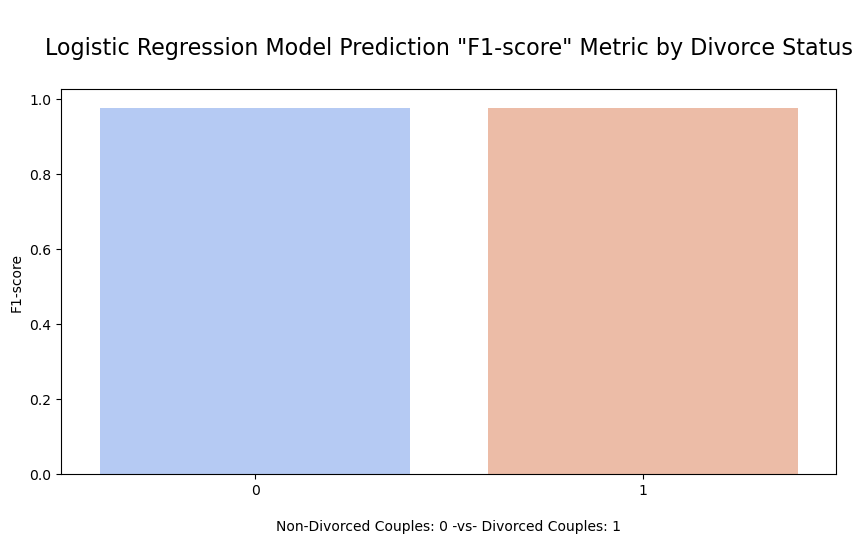

In [20]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scale, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test_scale)
lr_predictions

# Create a classification report
lr_cr = classification_report(y_test, lr_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_lr_cr_report = pd.DataFrame(lr_cr).transpose()
df_lr_cr_report

classes = df_lr_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_lr_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nLogistic Regression Model Prediction "{metric.capitalize()}" Metric by Divorce Status\n', fontsize=16)
    plt.xlabel('\nNon-Divorced Couples: 0 -vs- Divorced Couples: 1\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


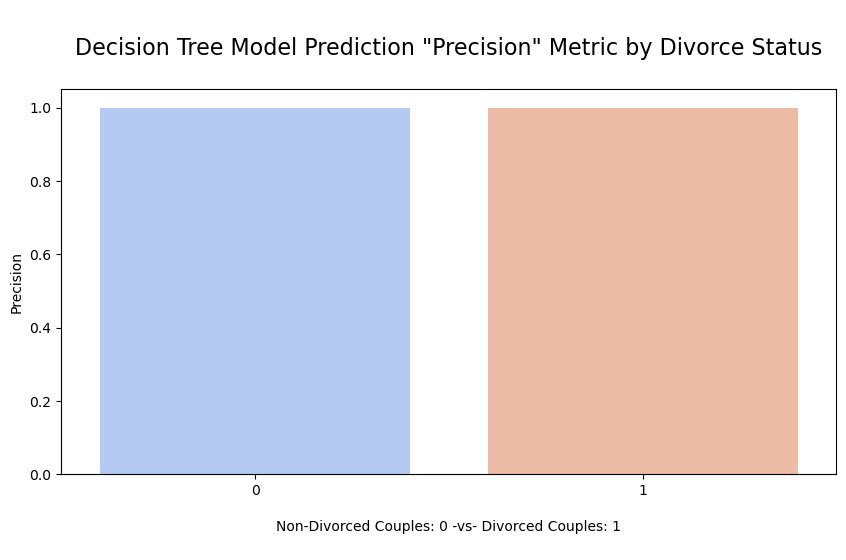

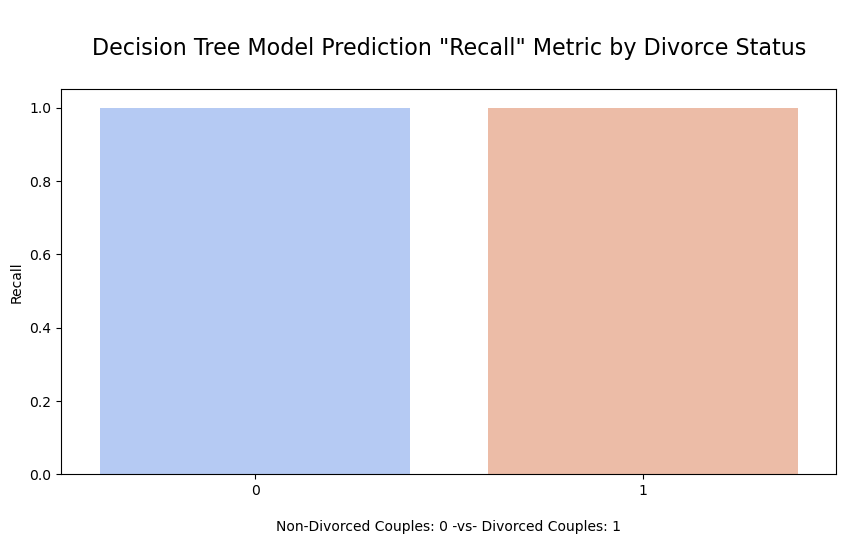

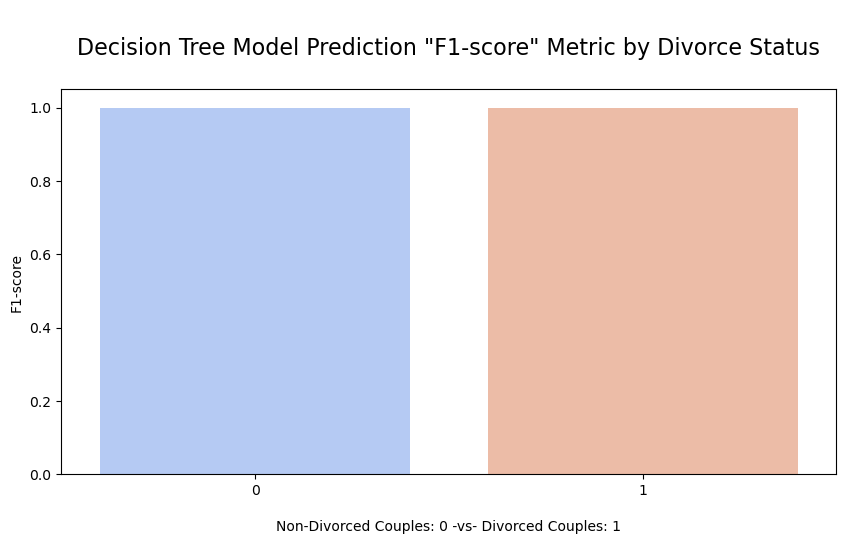

In [21]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scale, y_train)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test_scale)
dt_predictions

# Create a classification report
dt_cr = classification_report(y_test, dt_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_dt_cr_report = pd.DataFrame(dt_cr).transpose()
df_dt_cr_report

classes = df_dt_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_dt_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nDecision Tree Model Prediction "{metric.capitalize()}" Metric by Divorce Status\n', fontsize=16)
    plt.xlabel('\nNon-Divorced Couples: 0 -vs- Divorced Couples: 1\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()



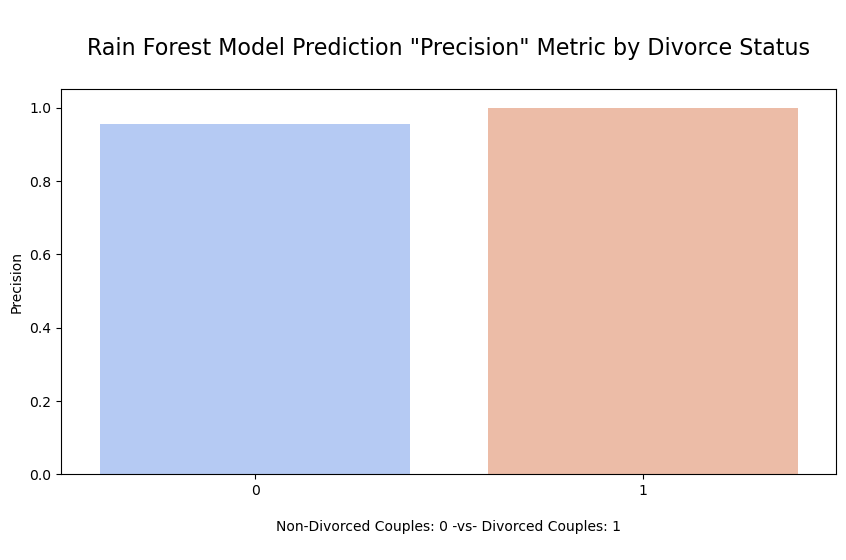

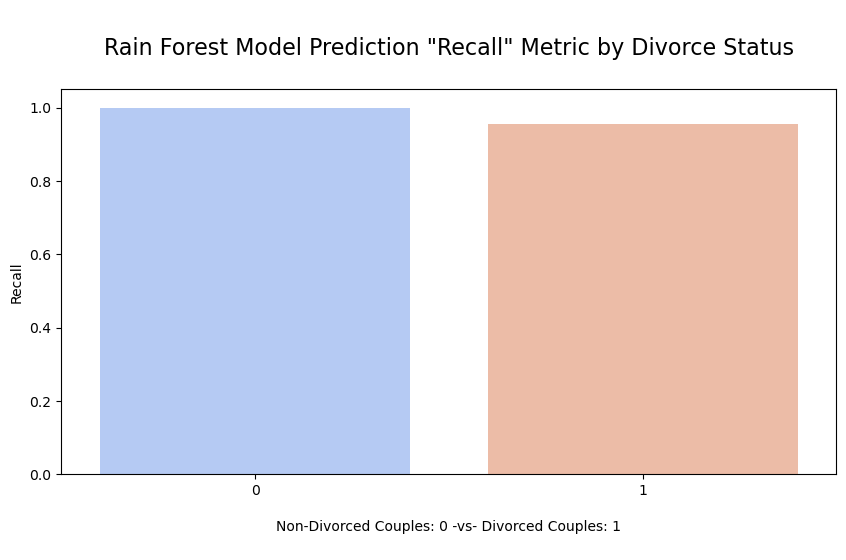

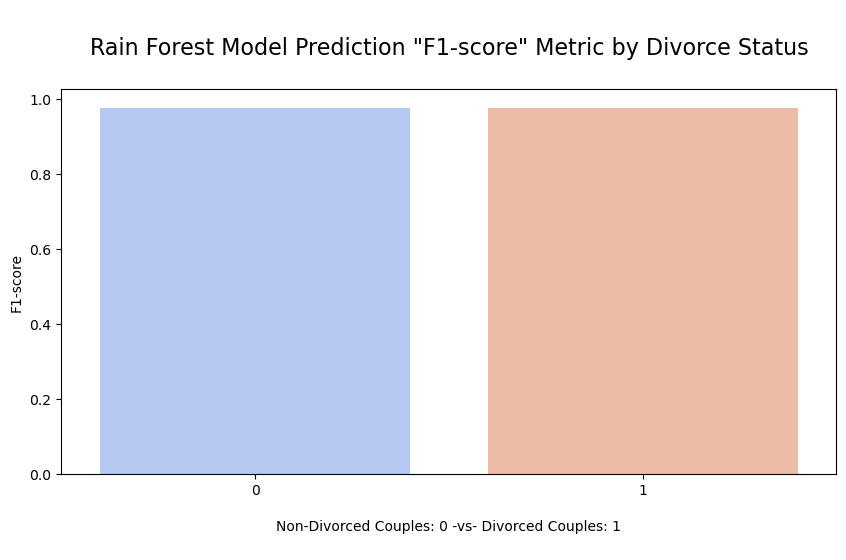

In [22]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scale, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scale)
rf_predictions

# Create a classification report
rf_cr = classification_report(y_test, rf_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_rf_cr_report = pd.DataFrame(rf_cr).transpose()
df_rf_cr_report

classes = df_rf_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_rf_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nRain Forest Model Prediction "{metric.capitalize()}" Metric by Divorce Status\n', fontsize=16)
    plt.xlabel('\nNon-Divorced Couples: 0 -vs- Divorced Couples: 1\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


In [23]:
# Validate the model by checking the model accuracy with model.score
print(f"Random Forest Model Training Accuracy: {rf_model.score(X_train_scale, y_train)}")
print(f"Random Forest Model Testing Accuracy: {rf_model.score(X_test_scale, y_test)}")

print(f"Decision Tree Model Training Accuracy: {dt_model.score(X_train_scale, y_train)}")
print(f"Decision Tree Model Testing Accuracy: {dt_model.score(X_test_scale, y_test)}")

#print(f"K-nearest neighbor Model Training Accuracy: {neigh_model.score(X_train_scale, y_train)}")
#print(f"K-nearest neighbor Model Testing Accuracy: {neigh_model.score(X_test_scale, y_test)}")

print(f"Logistic Regression Model Training Accuracy: {lr_model.score(X_train_scale, y_train)}")
print(f"Logistic Regression Model Testing Accuracy: {lr_model.score(X_test_scale, y_test)}")


Random Forest Model Training Accuracy: 1.0
Random Forest Model Testing Accuracy: 0.9767441860465116
Decision Tree Model Training Accuracy: 1.0
Decision Tree Model Testing Accuracy: 1.0
Logistic Regression Model Training Accuracy: 1.0
Logistic Regression Model Testing Accuracy: 0.9767441860465116


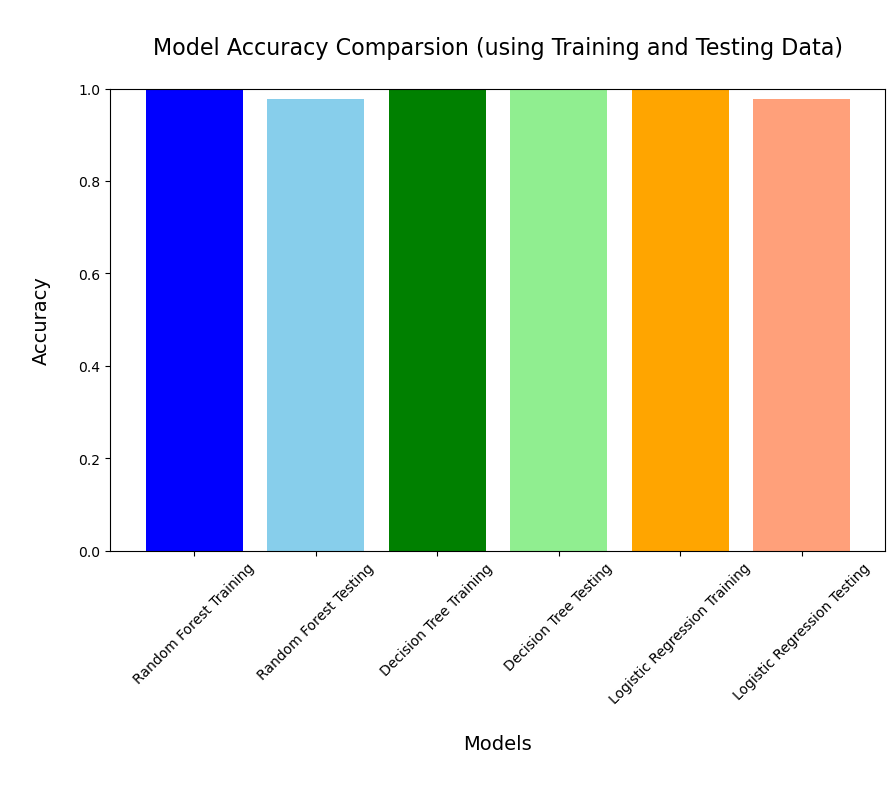

In [24]:
# Create a chart to compare Accuracy of each Model

# Model names
models = [
    'Random Forest Training', 
    'Random Forest Testing',
    'Decision Tree Training',
    'Decision Tree Testing',
#    'K-nearest neighbor Training',
#    'K-nearest neighbor Testing',
    'Logistic Regression Training',
    'Logistic Regression Testing'
    ]

# Model scores
scores = [
    rf_model.score(X_train_scale, y_train),
    rf_model.score(X_test_scale, y_test),
    dt_model.score(X_train_scale, y_train),
    dt_model.score(X_test_scale, y_test),
#    neigh_model.score(X_train_scale, y_train),
#    neigh_model.score(X_test_scale, y_test),
    lr_model.score(X_train_scale, y_train),
    lr_model.score(X_test_scale, y_test)
]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'skyblue', 'green', 'lightgreen', 'orange', 'lightsalmon', 'red', 'pink'])
plt.xticks(rotation=45)
plt.xlabel('\nModels\n', fontsize=14)
plt.ylabel('\nAccuracy\n', fontsize=14)
plt.title('\nModel Accuracy Comparsion (using Training and Testing Data)\n', fontsize=16)
plt.ylim(0, 1)
plt.show()